In [4]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles
Random.seed!(123)
include("src/QuantumResource1D.jl")
include("src/HL_module.jl")

Main.HL1D

In [ ]:
N = 5
g_values = range(-1.0, 1.0, 100)
all_params, all_costs, all_qr = [], [], []
all_X_exp, all_O_exp, all_ZZ_exp = [], [], []
fidelity_ghz_vals, fidelity_cluster_vals = [], []

for g in g_values
    println("\n=== g = $g ===")

    qr_g = QR1D.QuantumResource1D(N)
    GHZ_wf, params_GHZ, name_GHZ = QR1D.generate_GHZ_state(qr_g)
    cluster_wf, params_cluster, name_cluster = QR1D.generate_cluster_state(qr_g)
    QR1D.AddQR(qr_g, GHZ_wf, params_GHZ, name_GHZ)
    QR1D.AddQR(qr_g, cluster_wf, params_cluster, name_cluster);

    θ_g, cost_g = QR1D.optimize_circuit_QR(qr_g, g)
    psi_g = QR1D.apply_ladder_circuit(qr_g, θ_g)

    push!(all_params, θ_g)
    push!(all_costs, cost_g)
    push!(all_qr, qr_g)
    push!(all_X_exp, real(inner(psi_g', qr_g.aux_ops[1], psi_g)))
    push!(all_O_exp, real(inner(psi_g', qr_g.aux_ops[2], psi_g)))
    push!(all_ZZ_exp, real(inner(psi_g', qr_g.aux_ops[3], psi_g)))
    push!(fidelity_ghz_vals, abs2(inner(psi_g, GHZ_wf)))
    push!(fidelity_cluster_vals, abs2(inner(psi_g, cluster_wf)))
end


all_params_mat = hcat(all_params...)
writedlm("DATA/all_params_mat.txt", all_params_mat)
writedlm("DATA/g_values.txt", collect(g_values))
writedlm("DATA/fidelity_ghz_vals.txt", fidelity_ghz_vals)
writedlm("DATA/fidelity_cluster_vals.txt", fidelity_cluster_vals)
writedlm("DATA/X_exp.txt", all_X_exp)
writedlm("DATA/O_exp.txt", all_O_exp)
writedlm("DATA/ZZ_exp.txt", all_ZZ_exp)
writedlm("DATA/cost_values.txt", all_costs)


=== g = -1.0 ===
Fidelity wrt to GHZ = 1.0
Fidelity wrt to cluster state = 1.0
Optimizing for g = -1.0...
Iter     Function value   Gradient norm 
     0     1.917353e-32     1.167199e-11
 * time: 6.699562072753906e-5
Optimizing for g = -1.0...
Iter     Function value   Gradient norm 
     0    -1.000000e+00     4.308552e-09
 * time: 4.506111145019531e-5

=== g = -0.9797979797979798 ===
Fidelity wrt to GHZ = 1.0
Fidelity wrt to cluster state = 1.0
Optimizing for g = -0.9797979797979798...
Iter     Function value   Gradient norm 
     0    -1.010101e-02     1.131568e-11
 * time: 0.00021886825561523438
Optimizing for g = -0.9797979797979798...
Iter     Function value   Gradient norm 
     0    -9.898990e-01     1.948095e-02
 * time: 5.1975250244140625e-5
     1    -9.899279e-01     6.577089e-03
 * time: 0.06405115127563477
     2    -9.899410e-01     2.635712e-03
 * time: 0.12531495094299316
     3    -9.899418e-01     2.066797e-03
 * time: 0.19386816024780273
     4    -9.899426e-01   

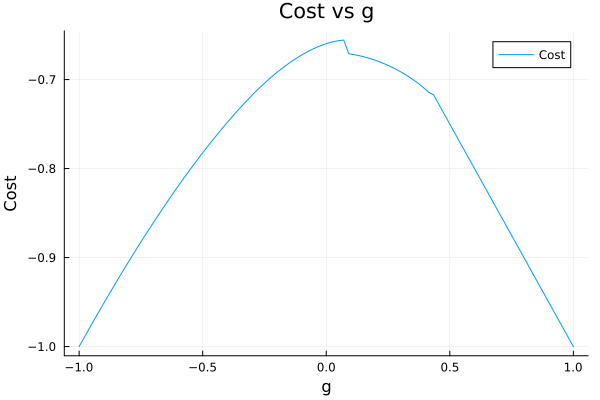

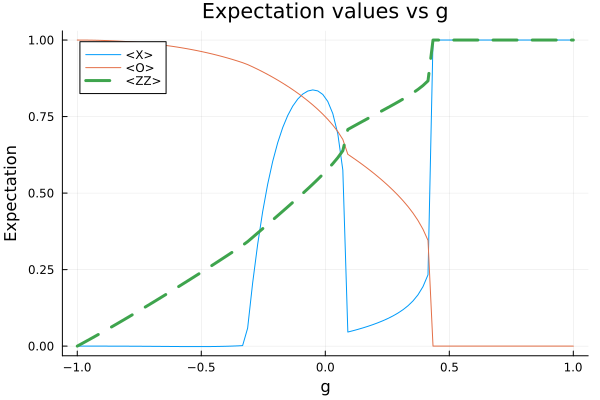

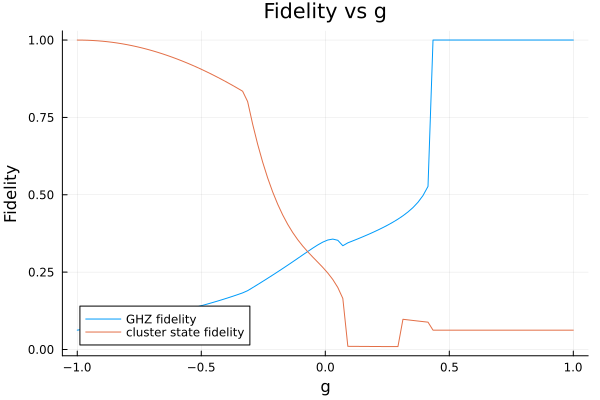

fidelity_ghz_vals = Any[0.062499999836197986, 0.06474382861625119, 0.06705674320242576, 0.06943967240691877, 0.07189355401042719, 0.07441934793812226, 0.07701805745113695, 0.0796907438967489, 0.08243854759238814, 0.08526270655994479, 0.08816457705333465, 0.0911456527095585, 0.09420758552064405, 0.09735220340261075, 0.10058153183810466, 0.1038978103840809, 0.10730351293159451, 0.11080136586109889, 0.11439436749710115, 0.11808580699188376, 0.12187928776290564, 0.12577874678244977, 0.12978848500975557, 0.13391319197601256, 0.13815798123325138, 0.1425284280123664, 0.1470306150103699, 0.151671185203536, 0.15645740436515926, 0.1613972337189983, 0.16649942188363395, 0.1717736053487382, 0.17723043000176888, 0.18288170269571044, 0.19005084641747286, 0.1998696954669006, 0.20982482202991717, 0.21991098097501577, 0.23012775607600455, 0.24047899228602954, 0.2509715754138372, 0.26161329340978917, 0.2724093001533619, 0.28335641081255547, 0.29443386675657207, 0.30558848003406436, 0.3167107056707751, 0

100-element Vector{Any}:
 0.9999999999999997
 0.9998583535016594
 0.9994282464241634
 0.9987025169426941
 0.9976748295978026
 0.996339708870221
 0.9946925707939803
 0.9927297305602026
 0.9904484002733799
 0.9878466735684204
 ⋮
 0.06249999999999993
 0.06249999999999993
 0.06249999999999993
 0.06249999999999993
 0.06249999999999993
 0.06249999999999993
 0.06249999999999993
 0.06249999999999993
 0.06249999999999993

In [6]:
p1 = plot(g_values, all_costs, label="Cost", title="Cost vs g", xlabel="g", ylabel="Cost");
p2 = plot(g_values, all_X_exp, label="<X>", title="Expectation values vs g", xlabel="g", ylabel="Expectation",linewidth=1);
plot!(p2, g_values, all_O_exp, label="<O>",linewidth=1);
plot!(p2, g_values, all_ZZ_exp / (N - 1), label="<ZZ>",linestyle=:dash,linewidth=3);

p3 = plot(g_values, fidelity_ghz_vals, label="GHZ fidelity", title="Fidelity vs g", xlabel="g", ylabel="Fidelity");
plot!(p3, g_values, fidelity_cluster_vals, label="cluster state fidelity");

display(p1)
display(p2)
display(p3)

@show fidelity_ghz_vals
@show fidelity_cluster_vals